Uzunlik: 0.5 m, 1.42 s, Gravitatsion tezlanish: 9.79 m/s^2
Uzunlik: 1.0 m, 2.01 s, Gravitatsion tezlanish: 9.77 m/s^2
Uzunlik: 1.5 m, 2.45 s, Gravitatsion tezlanish: 9.87 m/s^2
Uzunlik: 2.0 m, 2.83 s, Gravitatsion tezlanish: 9.86 m/s^2


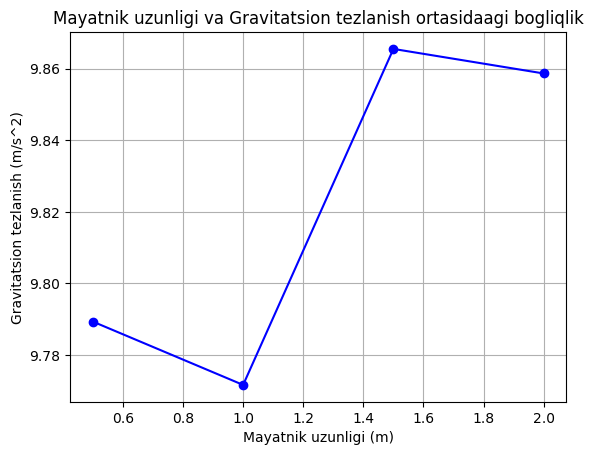

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Mayatnikning uzunligi (metrda) va o'lchagan davr (sekundlarda)
L_values = np.array([0.5, 1.0, 1.5, 2.0]) # Uzunliklar metrlarda
T_values = np.array([1.42, 2.01, 2.45, 2.83]) # tebranishlar davri, sekundda 

# Gravitatsion tezla ishni hisoblash funksiyalari
def calculate_gravity(L, T):
    return (4 * np.pi**2 * L) / T**2

# har bir uzunlik va davr uchun tortishish tezlanishini aniqlash
g_values = calculate_gravity(L_values, T_values)

# Natijalarni jadval shaklida ko'rsatish
for i in range(len(L_values)):
    print(f"Uzunlik: {L_values[i]} m, {T_values[i]} s, Gravitatsion tezlanish: {g_values[i]:.2f} m/s^2")

# grafik chizish 
plt.plot(L_values, g_values, marker = 'o', linestyle='-', color='b')
plt.xlabel('Mayatnik uzunligi (m)')
plt.ylabel('Gravitatsion tezlanish (m/s^2)')
plt.title('Mayatnik uzunligi va Gravitatsion tezlanish ortasidaagi bogliqlik')
plt.grid(True)
plt.show()

Uzunlik: 0.6 m, Davr: 1.55 s, O'lchangan g: 9.86 m/s^2, Anomaliya: 0.05 m/s^2
Uzunlik: 1.2 m, Davr: 2.21 s, O'lchangan g: 9.70 m/s^2, Anomaliya: -0.11 m/s^2
Uzunlik: 1.8 m, Davr: 2.65 s, O'lchangan g: 10.12 m/s^2, Anomaliya: 0.31 m/s^2
Uzunlik: 2.4 m, Davr: 3.03 s, O'lchangan g: 10.32 m/s^2, Anomaliya: 0.51 m/s^2


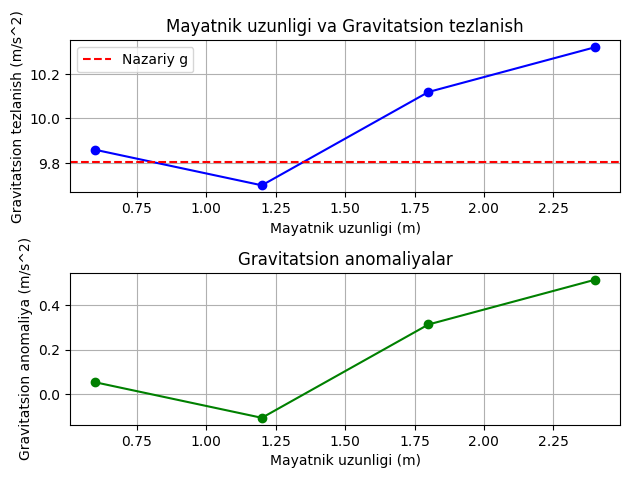

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Mayatnikning uzunligi (metrda) va o'lchagan davr (sekundlarda)
L_values = np.array([0.6, 1.2, 1.8, 2.4]) # Uzunliklar metrlarda
T_values = np.array([1.55, 2.21, 2.65, 3.03]) # tebranishlar davri, sekundda 

# Gravitatsion tezla ishni hisoblash funksiyalari
def calculate_gravity(L, T):
    return (4 * np.pi**2 * L) / T**2

# Nazriy gravitatsion tezlanish
g_theoritical = 9.80665

# Har bir uzunlik va davr uchun tirtishsish tezlanishi va anomaliyani hisoblash
g_measured = calculate_gravity(L_values, T_values)
g_anomaly = g_measured - g_theoritical 

# Natijalarni jadval shaklida ko'rsatish
for i in range(len(L_values)):
    print(f"Uzunlik: {L_values[i]} m, Davr: {T_values[i]} s, O'lchangan g: {g_measured[i]:.2f} m/s^2, Anomaliya: {g_anomaly[i]:.2f} m/s^2") 

# # grafik chizish 
plt.subplot(2, 1, 1)
plt.plot(L_values, g_measured, marker = 'o', linestyle='-', color='b')
plt.axhline(g_theoritical, color='r', linestyle='--', label="Nazariy g")
plt.xlabel('Mayatnik uzunligi (m)')
plt.ylabel('Gravitatsion tezlanish (m/s^2)')
plt.title('Mayatnik uzunligi va Gravitatsion tezlanish')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(L_values, g_anomaly, marker = 'o', linestyle='-', color='g')
plt.xlabel('Mayatnik uzunligi (m)')
plt.ylabel('Gravitatsion anomaliya (m/s^2)')
plt.title('Gravitatsion anomaliyalar')
plt.grid(True)

plt.tight_layout()
plt.show()




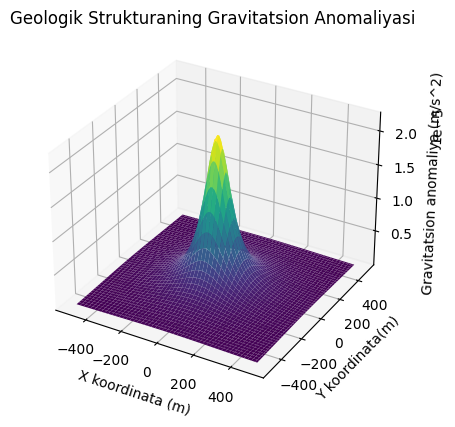

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitatsion konstanta
G = 6.67430e-11

# geologik qatlamlarning parametrlari: zichlik, hajm, chuqurlik
layers = [
    {'density': 3000, 'volume': 1e8, 'depth': 100}, # 1-qatlam ruda maydoni
    {'density': 1500, 'volume': 1.5e8, 'depth': 200}, # 2-qatlam bo'shashgan qatlam
    {'density': 2500, 'volume': 2e8, 'depth': 400}, # 3-qatlam qattiq jinslar
]

# Gravimetrik anomaliyalarni hisoblash funksiyasi
def calculate_gravity_anomaly(x, y, layers):
    delta_g = 0
    for layer in layers:
        r_squared = x**2 + y**2
        depth = layer['depth']
        density = layer['density']
        volume = layer['volume']
        delta_g += G * density * volume / (r_squared + depth**2)**(3/2)
    return delta_g

# O'lcov maydoni 
x_values = np.linspace(-500, 500, 100)
y_values = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x_values, y_values)

# Gravitatsion anomaliyalarni har bir nuqtada hisoblash
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = calculate_gravity_anomaly(X[i, j], Y[i, j], layers)

# natijalarni 3D Shaklda tasvirlash
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X koordinata (m)')
ax.set_ylabel('Y koordinata(m)')
ax.set_zlabel('Gravitatsion anomaliya (m/s^2)')
plt.title('Geologik Strukturaning Gravitatsion Anomaliyasi')
plt.show()


